In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import skimage
import scipy.signal
from scipy.signal import correlate

import requests
from sklearn.cluster import KMeans
from PIL import Image
from io import BytesIO
from google.colab.patches import cv2_imshow

# **Q3** Sum of Sinusoids in Noise

In [ ]:
# Sampling frequency
fs = 10000  # Hz

# Time duration
duration = 2048  # samples

# Time array
t = np.arange(duration) / fs

# Frequencies and amplitudes
frequencies = [800, 1500, 2300, 3750]  # Hz
amplitudes = [100, 57, 23, 11]

# Generate the signal
x = np.zeros(duration)
for freq, amp in zip(frequencies, amplitudes):
    x += amp * np.sin(2 * np.pi * freq * t)

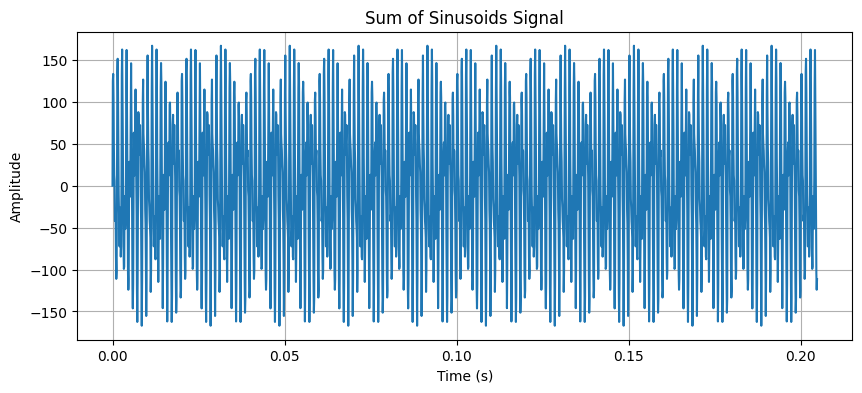

In [ ]:
# Plot the signal
plt.figure(figsize=(10, 4))
plt.plot(t, x)
plt.title('Sum of Sinusoids Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [ ]:
# DFT with rectangular window
dft_rect = np.fft.fft(x)

# DFT with Hamming window
hamming_window = np.hamming(duration)
signal_hamming = x.copy() * hamming_window
dft_hamming = np.fft.fft(signal_hamming)

# Frequency axis
freqs = np.fft.fftfreq(duration, 1/fs)

# Ideal spectrum of the continuous-time signal

# Peaks frequencies
peak_freqs = [800, 1500, 2300, 3750]  # Hz
peak_amplitudes = [100, 57, 23, 11]


# Initialize ideal_spectra array with zeros
ideal_spectrum = np.zeros_like(freqs)
N = len(ideal_spectrum)

# Find indices corresponding to peak frequencies
for freq, amp in zip(peak_freqs, peak_amplitudes):
    # Find positive frequency index
    pos_index = np.abs(freqs - freq).argmin()
    # Find negative frequency index (Nyquist frequency is fs/2)
    neg_index = np.abs(freqs + freq).argmin()
    # Set values at peak indices to non-zero
    ideal_spectrum[pos_index] = np.max(np.abs(dft_rect))
    ideal_spectrum[neg_index] = np.max(np.abs(dft_rect))

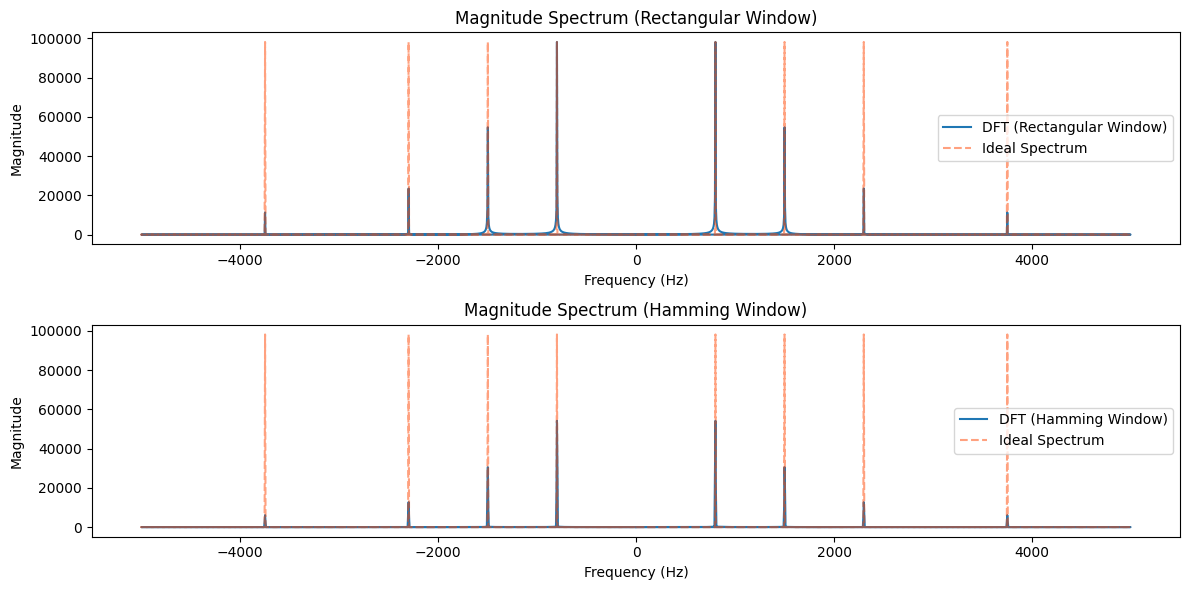

In [ ]:
# Plot
plt.figure(figsize=(12, 6))

# Magnitude spectrum with rectangular window
plt.subplot(2, 1, 1)
plt.plot(freqs, np.abs(dft_rect), label='DFT (Rectangular Window)')
plt.plot(freqs, np.abs(ideal_spectrum), '--', color='orangered', alpha=0.5, label='Ideal Spectrum')
plt.title('Magnitude Spectrum (Rectangular Window)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()

# Magnitude spectrum with Hamming window
plt.subplot(2, 1, 2)
plt.plot(freqs, np.abs(dft_hamming), label='DFT (Hamming Window)')
plt.plot(freqs, np.abs(ideal_spectrum), '--', color='orangered', alpha=0.5, label='Ideal Spectrum')
plt.title('Magnitude Spectrum (Hamming Window)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()

plt.tight_layout()
plt.show()


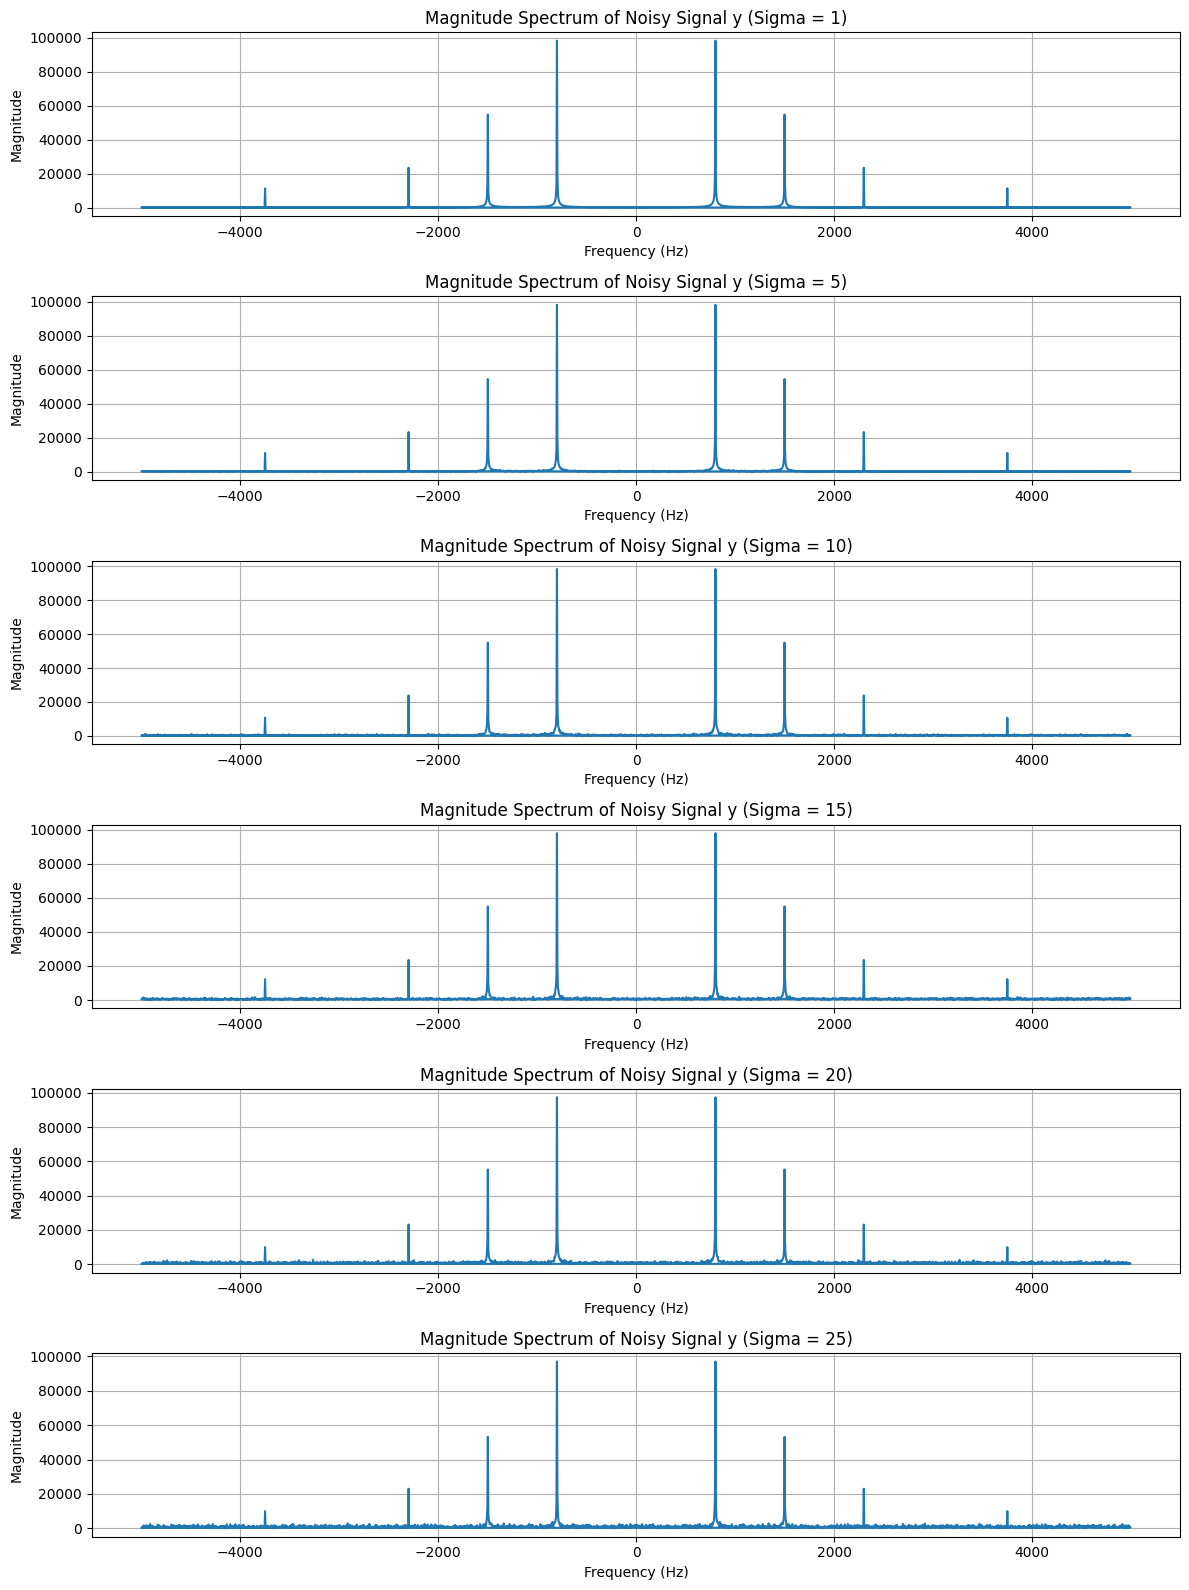

In [ ]:
# Define sigmas
sigmas = [1, 5, 10, 15, 20, 25]

plt.figure(figsize=(12, 16))

for i, sigma in enumerate(sigmas, start=1):
    # Generate noisy signal y
    w = np.random.normal(0, sigma, size=len(x))
    y = x.copy() + w

    # Compute DFT of y
    dft_y = np.fft.fft(y)

    # Plot magnitude spectrum with a different color for each plot
    plt.subplot(len(sigmas), 1, i)
    plt.plot(freqs, np.abs(dft_y))
    plt.title(f'Magnitude Spectrum of Noisy Signal y (Sigma = {sigma})')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)

plt.tight_layout()
plt.show()

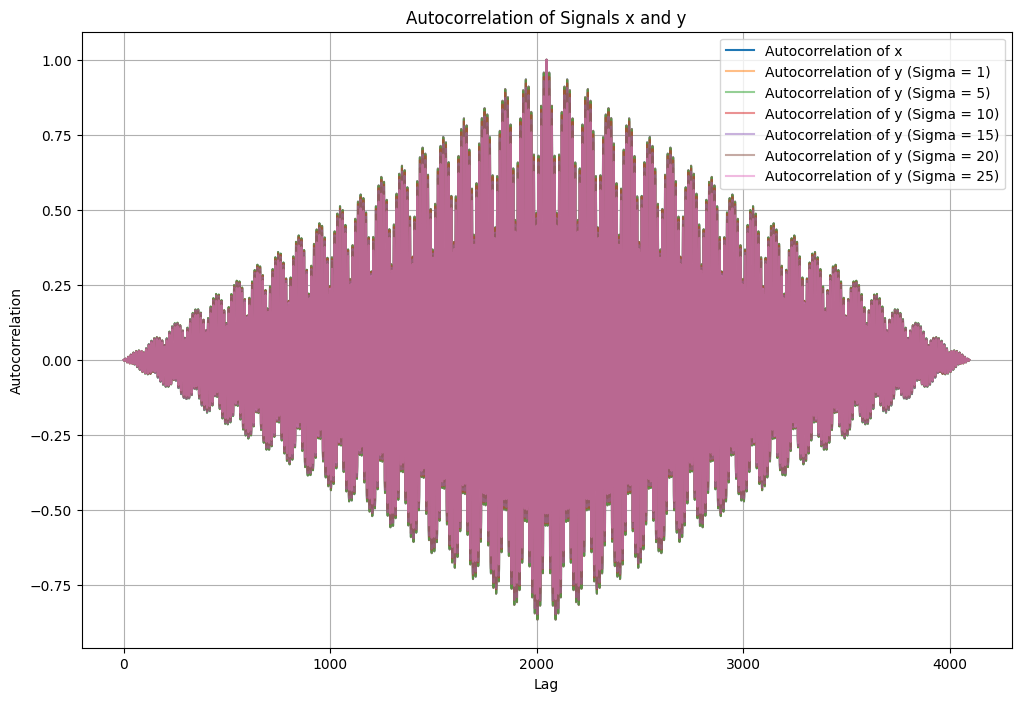

In [ ]:
# Define sigmas
sigmas = [1, 5, 10, 15, 20, 25]

# Compute autocorrelation of x and normalize
autocorr_x = correlate(x, x)
autocorr_x /= np.max(autocorr_x)

plt.figure(figsize=(12, 8))

plt.plot(autocorr_x, label='Autocorrelation of x')

for sigma in sigmas:
    # Generate noisy signal y
    w = np.random.normal(0, sigma, size=len(x))
    y = x.copy() + w

    # Compute autocorrelation of x and y
    autocorr_y = correlate(y, y)

    # Normalize autocorrelation values
    autocorr_y /= np.max(autocorr_y)

    # Plot autocorrelation

    plt.plot(autocorr_y, label=f'Autocorrelation of y (Sigma = {sigma})', alpha = 0.5)

plt.title('Autocorrelation of Signals x and y')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.legend()
plt.grid(True)
plt.show()
